# Data Exploration
1. Data cleaning (converting format + handling missing values)
2. Feature Engineering (Constructing New Features + Encoding Categorical Variables)
3. Correlations
4. Outlier detection (removing extreme values)

In [296]:
# Load dataset
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/qianqian/Desktop/DATA SCIENCE PROJECTS FOR BUSINESS/ds_project_car_price/train.csv')
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [297]:
# Data cleaning (converting format + handling missing values)

In [298]:
# Remove Dupicates
df.duplicated().sum()

np.int64(313)

In [299]:
df.drop_duplicates(inplace=True)

In [300]:
# Replace '-' with NaN in 'levy' column and convert to numeric type
df["Levy"] = df["Levy"].replace("-", np.nan)
# Fill missing values with the median
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Levy'] = df['Levy'].fillna(df['Levy'].median())

In [301]:
# Transform Mileage data (remove "km" and convert to numeric values)
df["Mileage"] = df["Mileage"].astype(str).str.replace(" km", "", regex=False).astype(float)

In [302]:
# Process the Engine volume column, remove "Turbo" and keep one decimal place
df["Engine volume"] = df["Engine volume"].astype(str).str.replace(" Turbo", "", regex=False)
df["Engine volume"] = df["Engine volume"].astype(float).round(1)

In [303]:
# Convert the 'Doors' column
df['Doors'] = df['Doors'].replace({'04-May': '4', '02-Mar': '2', '>5': '5'})
df['Doors'] = df['Doors'].astype(int)

In [305]:
# Feature Engineering (Constructing New Features + Encoding Categorical Variables)

In [306]:
# Create a new 'Car Age' feature
df["Car Age"] = 2024 - df["Prod. year"]
df.drop(columns=["Prod. year"], inplace=True)

In [ ]:
dummies = pd.get_dummies(df[['Drive wheels', 'Gear box type', 'Fuel type']], 
                              prefix=['Drive', 'Gear_box', 'Fuel'])
df = pd.concat([df, dummies], axis=1)
df.drop(['Drive wheels', 'Gear box type', 'Fuel type'], axis=1, inplace=True)

In [308]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [311]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   18924 non-null  int64  
 1   Price                18924 non-null  int64  
 2   Levy                 18924 non-null  float64
 3   Manufacturer         18924 non-null  int64  
 4   Model                18924 non-null  int64  
 5   Category             18924 non-null  int64  
 6   Leather interior     18924 non-null  int64  
 7   Fuel type            18924 non-null  int64  
 8   Engine volume        18924 non-null  float64
 9   Mileage              18924 non-null  float64
 10  Cylinders            18924 non-null  float64
 11  Gear box type        18924 non-null  int64  
 12  Drive wheels         18924 non-null  int64  
 13  Doors                18924 non-null  int64  
 14  Wheel                18924 non-null  int64  
 15  Color                18924 non-null  int6

In [103]:
# Outlier detection (removing extreme values)

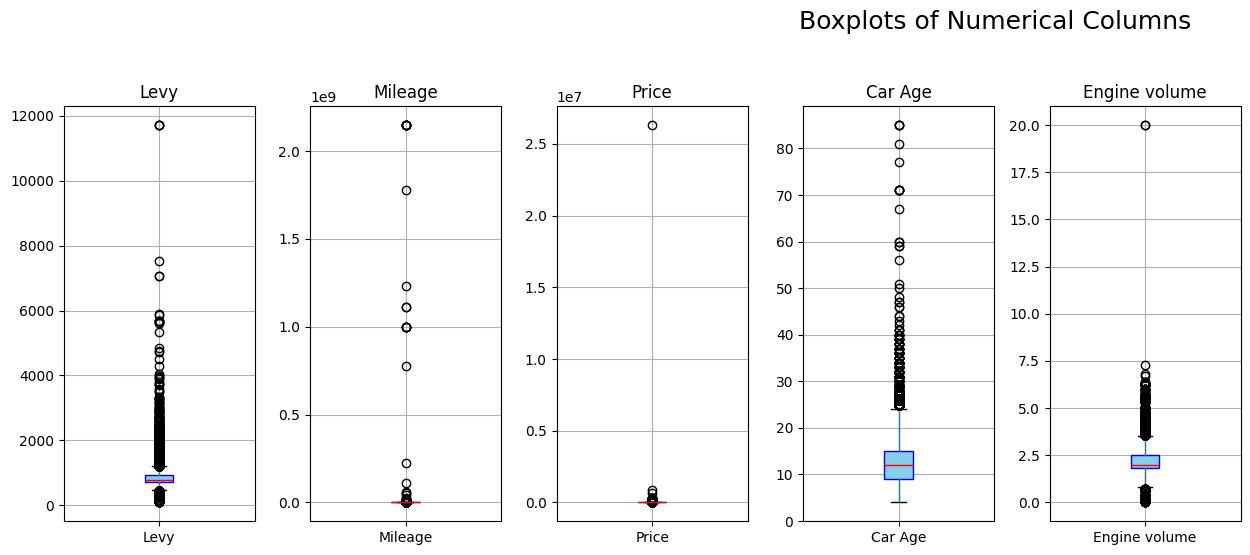

               Levy       Mileage         Price       Car Age  Engine volume
count  18924.000000  1.892400e+04  1.892400e+04  18924.000000   18924.000000
mean     868.498890  1.555373e+06  1.858744e+04     13.085764       2.306251
std      391.400489  4.880221e+07  1.921356e+05      5.665749       0.877591
min       87.000000  0.000000e+00  1.000000e+00      4.000000       0.000000
25%      730.000000  7.019575e+04  5.331000e+03      9.000000       1.800000
50%      781.000000  1.264000e+05  1.317200e+04     12.000000       2.000000
75%      917.000000  1.891198e+05  2.206300e+04     15.000000       2.500000
max    11714.000000  2.147484e+09  2.630750e+07     85.000000      20.000000


In [314]:
# Boxplot _ check for outliers
numerical_columns = ['Levy', 'Mileage', 'Price', 'Car Age', 'Engine volume']
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 8, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print(df[numerical_columns].describe())

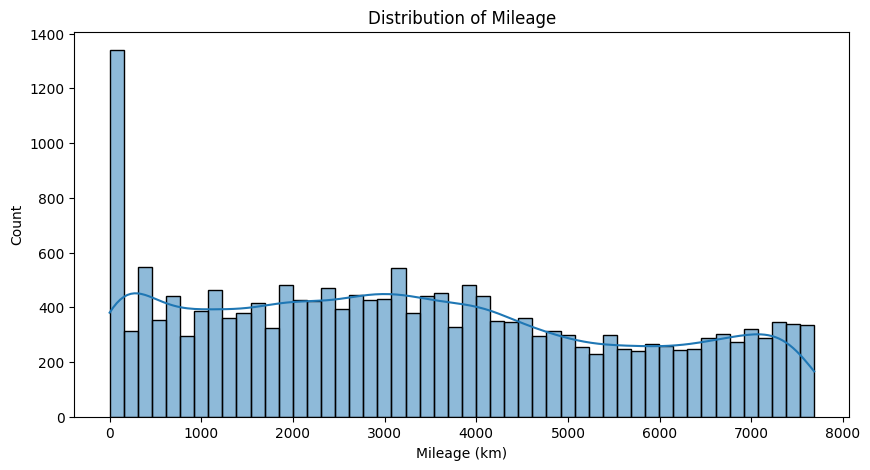

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot Mileage 
plt.figure(figsize=(10, 5))
sns.histplot(df["Mileage"], bins=50, kde=True)
plt.title("Distribution of Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Count")
plt.show()

The plot shows Mileage may have extremely large values.

In [315]:
from scipy.stats import mstats
# Remove 'Engine volume' values that are too large (we set > 8.0L are outliers)
df = df[df["Engine volume"] <= 8.0]
# Remove excessively large values for 'Mileage' (we set > 1,000,000 km are outliers)
df = df[df["Mileage"] <= 1_000_000]

# Remove data with 'Airbags' = 0 (because a normal car should have at least 2 airbags)
df = df[df["Airbags"] > 0]

# Remove outliers from 'Price' (using IQR method)
Q1 = df["Price"].quantile(0.125)
Q3 = df["Price"].quantile(0.875)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

In [317]:
# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values)

ID                     0
Price                  0
Levy                   0
Manufacturer           0
Model                  0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Car Age                0
Drive_4x4              0
Drive_Front            0
Drive_Rear             0
Gear_box_Automatic     0
Gear_box_Manual        0
Gear_box_Tiptronic     0
Gear_box_Variator      0
Fuel_CNG               0
Fuel_Diesel            0
Fuel_Hybrid            0
Fuel_Hydrogen          0
Fuel_LPG               0
Fuel_Petrol            0
Fuel_Plug-in Hybrid    0
dtype: int64


In [318]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16309 entries, 0 to 19236
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16309 non-null  int64  
 1   Price                16309 non-null  int64  
 2   Levy                 16309 non-null  float64
 3   Manufacturer         16309 non-null  int64  
 4   Model                16309 non-null  int64  
 5   Category             16309 non-null  int64  
 6   Leather interior     16309 non-null  int64  
 7   Fuel type            16309 non-null  int64  
 8   Engine volume        16309 non-null  float64
 9   Mileage              16309 non-null  float64
 10  Cylinders            16309 non-null  float64
 11  Gear box type        16309 non-null  int64  
 12  Drive wheels         16309 non-null  int64  
 13  Doors                16309 non-null  int64  
 14  Wheel                16309 non-null  int64  
 15  Color                16309 non-null  int6

In [319]:
# Select numerical features (excluding ID and irrelevant variables)
numeric_features = ["Price", "Levy", "Engine volume", "Mileage", "Car Age"]
numeric_summary = df[numeric_features].describe()
# print
print(numeric_summary)

              Price          Levy  Engine volume         Mileage       Car Age
count  16309.000000  16309.000000   16309.000000    16309.000000  16309.000000
mean   16862.848856    859.959409       2.263315   139256.630265     12.984610
std    14660.404588    374.493299       0.804515   103820.578892      5.262971
min        1.000000     87.000000       0.000000        0.000000      4.000000
25%     6586.000000    730.000000       1.800000    69000.000000      9.000000
50%    13799.000000    781.000000       2.000000   124228.000000     12.000000
75%    22580.000000    893.000000       2.500000   184000.000000     15.000000
max    86243.000000  11714.000000       7.300000  1000000.000000     71.000000


In [320]:
# Calculate the correlation matrix of numeric features
correlation_matrix = df[numeric_features].corr()
correlation_matrix

,Price,Levy,Engine volume,Mileage,Car Age
Price,1.000000,-0.015198,0.051152,-0.224419,-0.337063
Levy,-0.015198,1.000000,0.464128,0.027145,0.037714
Engine volume,0.051152,0.464128,1.000000,0.131319,0.069703
Mileage,-0.224419,0.027145,0.131319,1.000000,0.201952
Car Age,-0.337063,0.037714,0.069703,0.201952,1.000000


In [321]:
numeric_summary = df[numeric_features].describe()
print(numeric_summary)

              Price          Levy  Engine volume         Mileage       Car Age
count  16309.000000  16309.000000   16309.000000    16309.000000  16309.000000
mean   16862.848856    859.959409       2.263315   139256.630265     12.984610
std    14660.404588    374.493299       0.804515   103820.578892      5.262971
min        1.000000     87.000000       0.000000        0.000000      4.000000
25%     6586.000000    730.000000       1.800000    69000.000000      9.000000
50%    13799.000000    781.000000       2.000000   124228.000000     12.000000
75%    22580.000000    893.000000       2.500000   184000.000000     15.000000
max    86243.000000  11714.000000       7.300000  1000000.000000     71.000000


In [322]:
# calculate skewness and kurtosis
skewness = df[numeric_features].skew()
kurtosis = df[numeric_features].kurt()

# Merge Statistics
distribution_stats = pd.DataFrame({"Skewness": skewness, "Kurtosis": kurtosis})
print(distribution_stats)

               Skewness    Kurtosis
Price          1.426354    2.411883
Levy           7.990129  163.949691
Engine volume  1.522116    3.321960
Mileage        1.821211    6.895155
Car Age        1.315107    2.959184


In [323]:
# Logarithmic transformation of prices to reduce skewness
df["Levy_log"] = np.log1p(df["Levy"])
#df["Mileage_log"] = np.log1p(df["Mileage"])
# set categories
df["Cylinders_Category"] = pd.cut(df["Cylinders"], bins=[0, 4, 6, 8, 12, 16], labels=["<=4", "5-6", "7-8", "9-12", ">12"])

In [325]:
df

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Gear_box_Variator,Fuel_CNG,Fuel_Diesel,Fuel_Hybrid,Fuel_Hydrogen,Fuel_LPG,Fuel_Petrol,Fuel_Plug-in Hybrid,Levy_log,Cylinders_Category
0,45654403,13328,1399.0,32,1242,4,1,2,3.5,186005.0,...,False,False,False,True,False,False,False,False,7.244228,5-6
1,44731507,16621,1018.0,8,658,4,0,5,3.0,192000.0,...,False,False,False,False,False,False,True,False,6.926577,5-6
2,45774419,8467,781.0,21,684,3,0,5,1.3,200000.0,...,True,False,False,False,False,False,True,False,6.661855,<=4
4,45809263,11726,446.0,21,684,3,1,5,1.3,91901.0,...,False,False,False,False,False,False,True,False,6.102559,<=4
5,45802912,39493,891.0,23,1305,4,1,1,2.0,160931.0,...,False,False,True,False,False,False,False,False,6.793466,<=4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,781.0,36,385,1,1,0,2.0,300000.0,...,False,True,False,False,False,False,False,False,6.661855,<=4
19233,45778856,15681,831.0,23,1334,9,1,5,2.4,161600.0,...,False,False,False,False,False,False,True,False,6.723832,<=4
19234,45804997,26108,836.0,23,1442,4,1,1,2.0,116365.0,...,False,False,True,False,False,False,False,False,6.729824,<=4
19235,45793526,5331,1288.0,8,456,4,1,1,2.0,51258.0,...,False,False,True,False,False,False,False,False,7.161622,<=4


# Baseline Model

In [326]:
# Split Data Into Train and Test
X = df.drop(['Price', 'ID'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of training inputs: {X_train.shape}")
print(f"Shape of testing inputs: {X_test.shape}")

Shape of training inputs: (13047, 32)
Shape of testing inputs: (3262, 32)


In [332]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16309 entries, 0 to 19236
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   16309 non-null  int64   
 1   Price                16309 non-null  int64   
 2   Levy                 16309 non-null  float64 
 3   Manufacturer         16309 non-null  int64   
 4   Model                16309 non-null  int64   
 5   Category             16309 non-null  int64   
 6   Leather interior     16309 non-null  int64   
 7   Fuel type            16309 non-null  int64   
 8   Engine volume        16309 non-null  float64 
 9   Mileage              16309 non-null  float64 
 10  Cylinders            16309 non-null  float64 
 11  Gear box type        16309 non-null  int64   
 12  Drive wheels         16309 non-null  int64   
 13  Doors                16309 non-null  int64   
 14  Wheel                16309 non-null  int64   
 15  Color                163

In [ ]:
# split data
X = df.drop(['Price', 'ID', 'Cylinders_Category','Levy'], axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [351]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features)  # Only numerical features are normalized
], remainder="passthrough")  # the rest of the features remain unchanged

# linear regression
baseline_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

# evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# print
print(f"Baseline Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Baseline Model Performance:
RMSE: 11218.57
R²: 0.3970


# Model Comparison

In [352]:
# Random forest model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features)  # StandardScaler
], remainder="passthrough")  # he rest of the features remain unchanged

# Random Forest
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10))
])

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# print results
print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Random Forest Model Performance:
RMSE: 7476.36
R²: 0.7322


In [354]:
# XGBoost Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# XGBoost
xgb_model = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# predict
y_pred = xgb_model.predict(X_test)

# evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# print results
print(f"XGBoost Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

XGBoost Model Performance:
RMSE: 6753.39
R²: 0.7815


Interpretation of Model Performance:
1. Baseline Model:
RMSE: 11218.57
R²: 0.3970
The baseline model is a simple model (linear regression). RMSE of 11218.57 means the model’s predictions deviate from the actual values by about 11218 units on average.
R² of 0.3970 suggests that the model can explain about 39.7% of the variance in the target variable (Price). This is a relatively low R², indicating that the model is not doing a very good job of explaining the target variable's variation, which is typical for a simple baseline model.

3. Random Forest Model:
RMSE: 7476.36
R²: 0.7322
The Random Forest model, a more complex ensemble method, performs better:
RMSE of 7476.36: The average deviation between predicted and actual values is much lower than the baseline model, meaning the model's predictions are significantly closer to the true values.
R² of 0.7322: This model explains about 73.22% of the variance in the target variable, which is a substantial improvement over the baseline model. This suggests that Random Forest is capturing much more of the underlying relationships in the data.


3. XGBoost Model:
RMSE: 6753.39
R²: 0.7815
The XGBoost model is performing better than Random Forest, but only slightly:
RMSE of 6753.39: The deviation between predicted and actual values is lower than both the baseline and Random Forest models, indicating that XGBoost is providing the most accurate predictions of all the models tested.
R² of 0.7815: This model explains 78.15% of the variance in the target variable, which is the highest R² among the three models. XGBoost has clearly learned more from the data and has a stronger predictive power compared to both the baseline and Random Forest models.

In [ ]:
#pd.set_option('display.max_columns', None)
# Output the first two rows of all columns in the DataFrame
#print(df.head(2))


# Hyperparameter Tuning

In [343]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Define XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Hyperparameter grid for GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
}

# Perform GridSearchCV to optimize hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_xgb_model = grid_search.best_estimator_

# Predict
y_pred = best_xgb_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"XGBoost Model Performance with Optimized Hyperparameters:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8; total time=   3.5s
[

/opt/anaconda3/envs/timeseries/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.7; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.9; total time=   3.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, 

In [344]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint


scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Define XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Hyperparameter distribution for RandomizedSearchCV
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(6, 20),
    "learning_rate": uniform(0.01, 0.1),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.7, 0.3),
}

# Perform RandomizedSearchCV to optimize hyperparameters
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=100, cv=5, 
                                   random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_xgb_model = random_search.best_estimator_

# Predict
y_pred = best_xgb_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"XGBoost Model Performance with Optimized Hyperparameters:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.9; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.9; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   1.2s
[C

/opt/anaconda3/envs/timeseries/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'colsample_bytree': np.float64(0.7211248392548631), 'learning_rate': np.float64(0.030891871761536023), 'max_depth': 11, 'n_estimators': 250, 'subsample': np.float64(0.7420252045709572)}
XGBoost Model Performance with Optimized Hyperparameters:
RMSE: 6431.21
R²: 0.8018


In [345]:
from scipy.stats import uniform, randint

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    "n_estimators": randint(100, 1000),
    "max_depth": randint(6, 20),
    "learning_rate": uniform(0.01, 0.1),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 1),
    "min_child_weight": randint(1, 10),
}

# Perform RandomizedSearchCV to optimize hyperparameters
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=200, scoring='neg_mean_squared_error', cv=5, 
                                   n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_xgb_model = random_search.best_estimator_

# Predict
y_pred = best_xgb_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Optimized XGBoost Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/opt/anaconda3/envs/timeseries/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'colsample_bytree': np.float64(0.7380330511289547), 'gamma': np.float64(0.3476192144826835), 'learning_rate': np.float64(0.013180468148516514), 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 744, 'subsample': np.float64(0.7843115072130903)}
Optimized XGBoost Model Performance:
RMSE: 6429.74
R²: 0.8019


Interpretation:
Model Performance: The XGBoost model has performed well, achieving an R² of 0.8019, meaning it can explain over 80% of the variation in the target variable. The RMSE of 6429.74 indicates the model's predictions are fairly close to the actual values.
Optimized Hyperparameters: The hyperparameters used here strike a balance between controlling overfitting and improving the model's predictive power. The deep trees (max_depth=11) and low learning rate (learning_rate=0.0132) allow the model to capture complex relationships while preventing overfitting with appropriate regularization (via gamma, min_child_weight, and colsample_bytree).

# Our best model

In [346]:
import pickle
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the best model with the optimized hyperparameters
best_xgb_model = XGBRegressor(
    colsample_bytree=0.7380330511289547,
    gamma=0.3476192144826835,
    learning_rate=0.013180468148516514,
    max_depth=11,
    min_child_weight=1,
    n_estimators=744,
    subsample=0.7843115072130903,
    random_state=42
)

# Train the best model on the training data
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print performance
print(f"Optimized XGBoost Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Save the best model using pickle
with open('best_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)

print("Best model saved as 'best_xgb_model.pkl'")

Optimized XGBoost Model Performance:
RMSE: 6429.74
R²: 0.8019
Best model saved as 'best_xgb_model.pkl'


In [359]:
print(X.columns)

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Car Age',
       'Drive_4x4', 'Drive_Front', 'Drive_Rear', 'Gear_box_Automatic',
       'Gear_box_Manual', 'Gear_box_Tiptronic', 'Gear_box_Variator',
       'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Hybrid', 'Fuel_Hydrogen', 'Fuel_LPG',
       'Fuel_Petrol', 'Fuel_Plug-in Hybrid', 'Levy_log'],
      dtype='object')
